# Bird Species Classification Using Deep Learning

### Importing the libraries

In [1]:
import os
import pandas as pd
import numpy as np
from torchvision.datasets import ImageFolder
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
base='F:/birds/'

In [3]:
os.listdir(base)

['birds.csv', 'test', 'train', 'valid']

# Exploratory Data Analysis

### check the no of classes in train, test and valid dataset

In [4]:
train_dir = base+'train'
test_dir = base+'test'
validation_dir = base+'valid'
print('No. of Train Classes:' + str(len(os.listdir(train_dir))))
print('No. of Test Classes:' + str(len(os.listdir(test_dir))))
print('No. of Validation Classes:' + str(len(os.listdir(validation_dir))))

No. of Train Classes:275
No. of Test Classes:275
No. of Validation Classes:275


### to show the total number of images in train, test and validation 

In [5]:
train_data = ImageFolder(train_dir)
test_data = ImageFolder(test_dir)
validation_data = ImageFolder(validation_dir)

print('No. of Train Images:' + str(len(train_data)))
print('No. of Test Images:' + str(len(test_data)))
print('No. of Validation Images:' + str(len(validation_data)))

No. of Train Images:39364
No. of Test Images:1375
No. of Validation Images:1375


### Name of All Classes

In [6]:
classes = list(train_data.class_to_idx.keys())
classes

['AFRICAN CROWNED CRANE',
 'AFRICAN FIREFINCH',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'ANHINGA',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ARARIPE MANAKIN',
 'ASIAN CRESTED IBIS',
 'BALD EAGLE',
 'BALI STARLING',
 'BALTIMORE ORIOLE',
 'BANANAQUIT',
 'BANDED BROADBILL',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN SWALLOW',
 'BARRED PUFFBIRD',
 'BAY-BREASTED WARBLER',
 'BEARDED BARBET',
 'BEARDED REEDLING',
 'BELTED KINGFISHER',
 'BIRD OF PARADISE',
 'BLACK & YELLOW bROADBILL',
 'BLACK FRANCOLIN',
 'BLACK SKIMMER',
 'BLACK SWAN',
 'BLACK TAIL CRAKE',
 'BLACK THROATED BUSHTIT',
 'BLACK THROATED WARBLER',
 'BLACK VULTURE',
 'BLACK-CAPPED CHICKADEE',
 'BLACK-NECKED GREBE',
 'BLACK-THROATED SPARROW',
 'BLACKBURNIAM WARBLER',
 'BLUE GROUSE',
 'BLUE HERON',
 'BOBOLINK',
 'BORNEAN BRISTLEHEAD',
 'BORNEAN LEAFBIRD',
 'BROWN NOODY',
 'BROWN THRASHER',
 'BULWERS

### Number of images in each Classes

In [7]:
from collections import Counter
img_counter = Counter([train_data.classes[labels] for _,labels in train_data])
img_counter

Counter({'AFRICAN CROWNED CRANE': 137,
         'AFRICAN FIREFINCH': 140,
         'ALBATROSS': 133,
         'ALEXANDRINE PARAKEET': 165,
         'AMERICAN AVOCET': 179,
         'AMERICAN BITTERN': 170,
         'AMERICAN COOT': 158,
         'AMERICAN GOLDFINCH': 133,
         'AMERICAN KESTREL': 130,
         'AMERICAN PIPIT': 179,
         'AMERICAN REDSTART': 139,
         'ANHINGA': 147,
         'ANNAS HUMMINGBIRD': 139,
         'ANTBIRD': 150,
         'ARARIPE MANAKIN': 155,
         'ASIAN CRESTED IBIS': 157,
         'BALD EAGLE': 160,
         'BALI STARLING': 132,
         'BALTIMORE ORIOLE': 137,
         'BANANAQUIT': 166,
         'BANDED BROADBILL': 194,
         'BAR-TAILED GODWIT': 114,
         'BARN OWL': 119,
         'BARN SWALLOW': 132,
         'BARRED PUFFBIRD': 136,
         'BAY-BREASTED WARBLER': 143,
         'BEARDED BARBET': 160,
         'BEARDED REEDLING': 144,
         'BELTED KINGFISHER': 125,
         'BIRD OF PARADISE': 128,
         'BLACK & YE

In [8]:
img_counter = Counter([test_data.classes[labels] for _,labels in test_data])
img_counter

Counter({'AFRICAN CROWNED CRANE': 5,
         'AFRICAN FIREFINCH': 5,
         'ALBATROSS': 5,
         'ALEXANDRINE PARAKEET': 5,
         'AMERICAN AVOCET': 5,
         'AMERICAN BITTERN': 5,
         'AMERICAN COOT': 5,
         'AMERICAN GOLDFINCH': 5,
         'AMERICAN KESTREL': 5,
         'AMERICAN PIPIT': 5,
         'AMERICAN REDSTART': 5,
         'ANHINGA': 5,
         'ANNAS HUMMINGBIRD': 5,
         'ANTBIRD': 5,
         'ARARIPE MANAKIN': 5,
         'ASIAN CRESTED IBIS': 5,
         'BALD EAGLE': 5,
         'BALI STARLING': 5,
         'BALTIMORE ORIOLE': 5,
         'BANANAQUIT': 5,
         'BANDED BROADBILL': 5,
         'BAR-TAILED GODWIT': 5,
         'BARN OWL': 5,
         'BARN SWALLOW': 5,
         'BARRED PUFFBIRD': 5,
         'BAY-BREASTED WARBLER': 5,
         'BEARDED BARBET': 5,
         'BEARDED REEDLING': 5,
         'BELTED KINGFISHER': 5,
         'BIRD OF PARADISE': 5,
         'BLACK & YELLOW bROADBILL': 5,
         'BLACK FRANCOLIN': 5,
         

In [9]:
img_counter = Counter([validation_data.classes[labels] for _,labels in validation_data])
img_counter

Counter({'AFRICAN CROWNED CRANE': 5,
         'AFRICAN FIREFINCH': 5,
         'ALBATROSS': 5,
         'ALEXANDRINE PARAKEET': 5,
         'AMERICAN AVOCET': 5,
         'AMERICAN BITTERN': 5,
         'AMERICAN COOT': 5,
         'AMERICAN GOLDFINCH': 5,
         'AMERICAN KESTREL': 5,
         'AMERICAN PIPIT': 5,
         'AMERICAN REDSTART': 5,
         'ANHINGA': 5,
         'ANNAS HUMMINGBIRD': 5,
         'ANTBIRD': 5,
         'ARARIPE MANAKIN': 5,
         'ASIAN CRESTED IBIS': 5,
         'BALD EAGLE': 5,
         'BALI STARLING': 5,
         'BALTIMORE ORIOLE': 5,
         'BANANAQUIT': 5,
         'BANDED BROADBILL': 5,
         'BAR-TAILED GODWIT': 5,
         'BARN OWL': 5,
         'BARN SWALLOW': 5,
         'BARRED PUFFBIRD': 5,
         'BAY-BREASTED WARBLER': 5,
         'BEARDED BARBET': 5,
         'BEARDED REEDLING': 5,
         'BELTED KINGFISHER': 5,
         'BIRD OF PARADISE': 5,
         'BLACK & YELLOW bROADBILL': 5,
         'BLACK FRANCOLIN': 5,
         

### Images Of Birds from train dataset

In [14]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

Found 39364 files belonging to 275 classes.


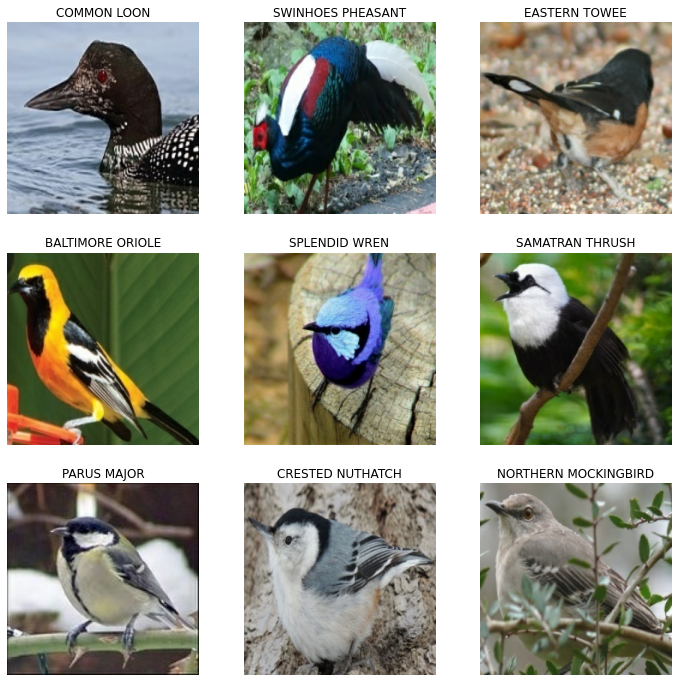

In [15]:
trains=image_dataset_from_directory(base+ 'train/',label_mode="int")
train_class=trains.class_names
plt.figure(figsize=(12,12))
for images, labels in trains.take(1):
    for i in range (9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_class[labels[i]])
        plt.axis("off")

In [17]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential

In [10]:
batch_size= 32
img_size =(224,224)
img_shape =(224,224,3)


In [6]:
# preprocessing
from tensorflow.keras.preprocessing.image import (ImageDataGenerator, 
                                       img_to_array, 
                                       array_to_img, 
                                       load_img)

In [7]:
train_datagen = ImageDataGenerator(
                             rescale=1/255)

In [8]:
size=224

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(size,size), 
        batch_size=batch_size,
        class_mode='sparse')

Found 39364 images belonging to 275 classes.


In [12]:
valid_datagen = ImageDataGenerator(rescale=1/255)

valid_generator = valid_datagen.flow_from_directory(
        validation_dir,  
        target_size=(size, size),
        batch_size=batch_size,
        class_mode='sparse')

Found 1375 images belonging to 275 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
        test_dir,  
        target_size=(size, size),  
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=False)

Found 1375 images belonging to 275 classes.


In [14]:
train_generator.class_indices

{'AFRICAN CROWNED CRANE': 0,
 'AFRICAN FIREFINCH': 1,
 'ALBATROSS': 2,
 'ALEXANDRINE PARAKEET': 3,
 'AMERICAN AVOCET': 4,
 'AMERICAN BITTERN': 5,
 'AMERICAN COOT': 6,
 'AMERICAN GOLDFINCH': 7,
 'AMERICAN KESTREL': 8,
 'AMERICAN PIPIT': 9,
 'AMERICAN REDSTART': 10,
 'ANHINGA': 11,
 'ANNAS HUMMINGBIRD': 12,
 'ANTBIRD': 13,
 'ARARIPE MANAKIN': 14,
 'ASIAN CRESTED IBIS': 15,
 'BALD EAGLE': 16,
 'BALI STARLING': 17,
 'BALTIMORE ORIOLE': 18,
 'BANANAQUIT': 19,
 'BANDED BROADBILL': 20,
 'BAR-TAILED GODWIT': 21,
 'BARN OWL': 22,
 'BARN SWALLOW': 23,
 'BARRED PUFFBIRD': 24,
 'BAY-BREASTED WARBLER': 25,
 'BEARDED BARBET': 26,
 'BEARDED REEDLING': 27,
 'BELTED KINGFISHER': 28,
 'BIRD OF PARADISE': 29,
 'BLACK & YELLOW bROADBILL': 30,
 'BLACK FRANCOLIN': 31,
 'BLACK SKIMMER': 32,
 'BLACK SWAN': 33,
 'BLACK TAIL CRAKE': 34,
 'BLACK THROATED BUSHTIT': 35,
 'BLACK THROATED WARBLER': 36,
 'BLACK VULTURE': 37,
 'BLACK-CAPPED CHICKADEE': 38,
 'BLACK-NECKED GREBE': 39,
 'BLACK-THROATED SPARROW': 40,
 'BL

### Importing the libraries required for the Convolution Neural Network

In [19]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense,Flatten,BatchNormalization,Activation,Input

### Transfer learning- ResNet101V2

In [15]:
from tensorflow.keras.applications import ResNet101V2
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

### Model Building

In [20]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(275,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 7, 7, 2048)        42626560  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)             

In [29]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

### model fitting

In [30]:
history=model.fit(train_generator,validation_data=valid_generator,
         epochs=5)

Epoch 1/5
1231/1231 [==============================] - 7152s 6s/step - loss: 1.8970 - accuracy: 0.5548 - val_loss: 0.3616 - val_accuracy: 0.8975
Epoch 2/5
1231/1231 [==============================] - 7122s 6s/step - loss: 0.5859 - accuracy: 0.8327 - val_loss: 0.2795 - val_accuracy: 0.9251
Epoch 3/5
1231/1231 [==============================] - 7296s 6s/step - loss: 0.3471 - accuracy: 0.8956 - val_loss: 0.2856 - val_accuracy: 0.9222
Epoch 4/5
1231/1231 [==============================] - 7266s 6s/step - loss: 0.2614 - accuracy: 0.9196 - val_loss: 0.2619 - val_accuracy: 0.9244
Epoch 5/5
1231/1231 [==============================] - 7233s 6s/step - loss: 0.2290 - accuracy: 0.9294 - val_loss: 0.2501 - val_accuracy: 0.9324


### Loss Plot
Our model is well trained and shows minimum loss in Loss Plot of train and validation data

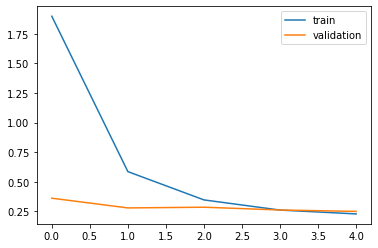

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc = 'upper right')

### Accuracy Plot
Here we shows the accuracy plot. from the plot we says that both train and validation data gives the better accuracy

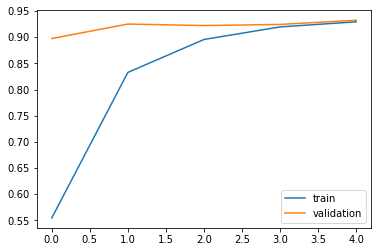

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc = 'lower right')

### Model Accuracy

In [34]:
model.evaluate(test_generator)

43/43 [==============================] - 175s 4s/step - loss: 0.2593 - accuracy: 0.9389


[0.25929951667785645, 0.938909113407135]

### Save our model 

In [38]:
model.save("BirdClassification.h5")

### Loading our save model

In [21]:
from tensorflow.keras.models import load_model
model = load_model("H:/DBDA Project/BirdClassification.h5")

### Function for predicting bird class

In [22]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,0)
    answer=np.argmax(model.predict(img), axis=-1)
    probability=round(np.max(model.predict(img)*100),2)
    print (probability, ' % chances are there that the Bird Is',icd[answer[0]])

### gives the input image to predict its class

#### Here our model is successfully predicted the bird species

100.0  % chances are there that the Bird Is SCARLET MACAW


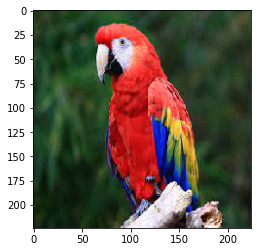

In [23]:
img="H:/Assignments/14.jpg"
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

100.0  % chances are there that the Bird Is HORNBILL


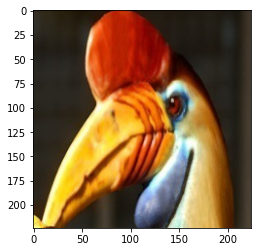

In [18]:
img="F:/archive/3.jpg"
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

100.0  % chances are there that the Bird Is JABIRU


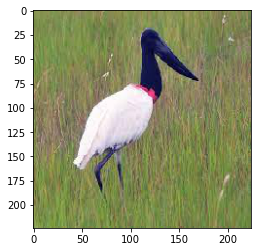

In [22]:
img="H:/DBDA Project/download.jpg"
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

100.0  % chances are there that the Bird Is BALD EAGLE


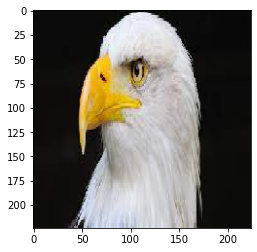

In [54]:
img="H:/DBDA Project/11.jpg"
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

99.67  % chances are there that the Bird Is BULWERS PHEASANT


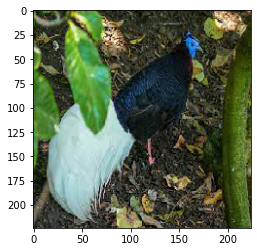

In [56]:
img="H:/DBDA Project/13.jpg"
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

100.0  % chances are there that the Bird Is BLACK SWAN


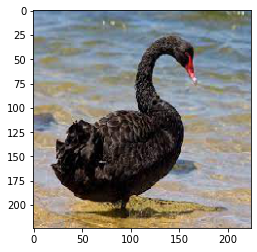

In [25]:

img="C:/Users/Ankit/Desktop/Interview Questions/111.jpg"
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)